In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
oliv = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/kushalgupta/scikit_learn_data


In [6]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [8]:
oliv['data'].shape

(400, 4096)

In [9]:
oliv['images'].shape

(400, 64, 64)

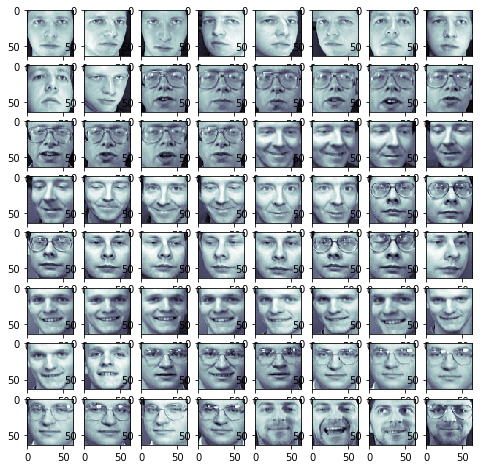

In [13]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i], cmap = plt.cm.bone)



In [45]:
x = oliv.data
y = oliv.target
x.shape

(400, 4096)

In [36]:
pca = PCA()
pca.fit(x)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
pca.components_.shape

(400, 4096)

In [18]:
k = 0
total = sum(pca.explained_variance_)
current_sum = 0
while current_sum/total < 0.95:
    current_sum += pca.explained_variance_[k]
    k += 1
k

123

In [38]:
pca = PCA(n_components = k, whiten = True)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

# getting original images back

In [39]:
approx_data = pca.inverse_transform(transformed_data)

In [40]:
approx_data.shape

(400, 4096)

In [41]:
approx_data = approx_data.reshape((400,64,64))


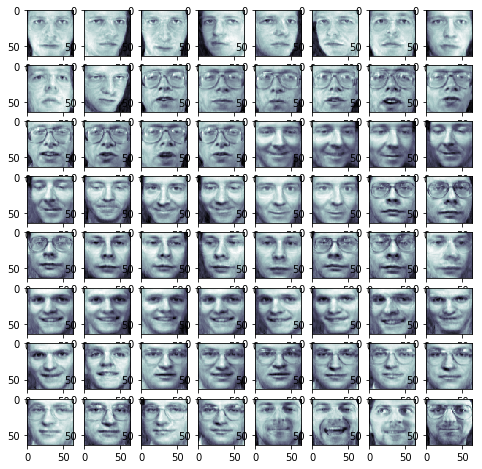

In [35]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(approx_data[i], cmap = plt.cm.bone)




In [42]:
eigenvectors = pca.components_
eigenvectors.shape

(123, 4096)

In [43]:
eigenfaces = eigenvectors.reshape((123,64,64))

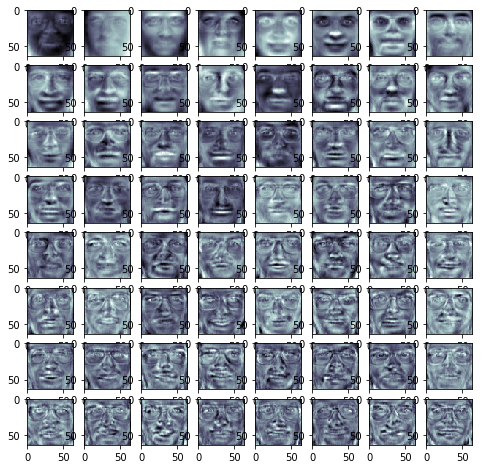

In [44]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i], cmap = plt.cm.bone)



